In [222]:
from functions import vectorize_y_ser, oped_v_news

In [2]:
import string

In [3]:
import re

In [4]:
import datetime

In [5]:
import nltk
import string

In [6]:
import pandas as pd
import numpy as np

In [7]:
from collections import Counter

In [8]:
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [9]:
def vectorize_y_ser(ser):
    y = ser.copy()
    y.replace({'Op-Ed': 1,'News': 0}, inplace=True)
    return y

In [215]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

# data

In [213]:
import os
import glob
import pandas as pd

#extension = 'csv'
#all_filenames = [i for i in glob.glob('*.{}'.format(extension))]
df2020 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2020.csv'
df2019 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2019.csv'
df2018 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2018.csv'
df2017 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2017.csv'
df2016 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2016.csv'
df2015 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2015.csv'
df2014 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2014.csv'
df2013 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2013.csv'
df2012 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2012.csv'
df2011 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2011.csv'
df2010 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2010.csv'
df2009 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2009.csv'
df2008 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2008.csv'
df2007 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2007.csv'
df2006 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2006.csv'
df2005 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2005.csv'
df2004 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2004.csv'
df2003 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2003.csv'
df2002 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2002.csv'
df2001 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2001.csv'
df2000 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_2000.csv'
df1999 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1999.csv'
df1998 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1998.csv'
df1997 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1997.csv'
df1996 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1996.csv'
df1995 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1995.csv'
df1994 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1994.csv'
df1993 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1993.csv'
df1992 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1992.csv'
df1991 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1991.csv'
df1990 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1990.csv'
df1989 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1989.csv'
df1988 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1988.csv'
df1987 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1987.csv'
df1986 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1986.csv'
df1985 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1985.csv'
df1984 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1984.csv'
df1983 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1983.csv'
df1982 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1982.csv'
df1981 = '/Users/djbetts/Desktop/opinion_classifier/data/archive/raw_1981.csv'

In [ ]:
#returns articles w/ 'United States Politics and Government' as a keyword
def return_pol_gov(row):
    list_dict = eval(row.keywords)
    for (dic) in (list_dict):
        if dic.get('value') == 'United States Politics and Government':
            return True

def keyword_filter(df, keyword='United States Politics and Government'):
    df[keyword] = df.apply(return_pol_gov, axis=1)
    df = df[df[keyword] == True]
    return df

In [11]:
#combine print, type, text columns in the list
def printed(file):
    print_cols = ['_id','print_page','pub_date','keywords','type_of_material','lead_paragraph','text']    
    df = pd.read_csv(file, usecols=print_cols, index_col='_id', low_memory=False)
    df = df[df.print_page.isna() == False]
    df = df[~df.text.isna() == True]
    return df

In [214]:
data2020 = printed(df2020)
data2019 = printed(df2019)
data2018 = printed(df2018)
data2017 = printed(df2017)
data2016 = printed(df2016)

In [216]:
data = pd.concat([data2020, data2019, data2018, data2017, data2016])

News: 145305 Oped: 10409, Total: 155714, Op-Ed 0.07 of total


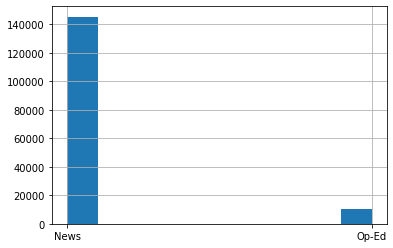

In [223]:
oped_v_news(data)

In [217]:
data.shape

(155714, 6)

In [218]:
%%time
df = keyword_filter(data)

CPU times: user 12 s, sys: 192 ms, total: 12.2 s
Wall time: 12.2 s


In [219]:
df.shape

(19167, 7)

In [220]:
df.columns

Index(['lead_paragraph', 'keywords', 'pub_date', 'type_of_material',
       'print_page', 'text', 'United States Politics and Government'],
      dtype='object')

News: 15679 Oped: 3488, Total: 19167, Op-Ed 0.18 of total


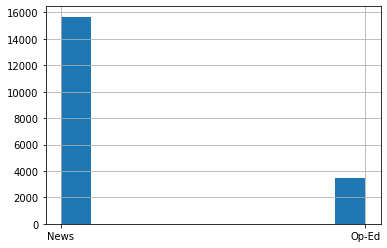

In [225]:
oped_v_news(df)

In [226]:
df['text'] = [text.replace(lead, "") for text, lead in zip(df.text[:].astype('str'), df.lead_paragraph[:].astype('str'))]

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [227]:
df.text[0][:500]

'But as you drew closer to the fifth floor, where Attorney General William Pelham Barr works out of a suite of offices, things started to loosen up. One assistant outside his conference room wore a mask, but the other did not. In the middle of the room, with its oil paintings and vaulted ceiling, the long central table had fewer chairs than you might expect, and an appropriate distance between them. But past the next door, inside the attorney general’s smaller personal office, Barr himself was al'

# remove quotations

In [228]:
#split document into article body and quotation
def text_parse(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
        
    return(article, quotation)

In [229]:
#split article and return quote
def return_article(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list += quote
    
    article = " ".join(article)
    quotation = " ".join(quote_list)
    
    return(article)

In [230]:
#split article and return quote
def return_quote(document):
    article = []
    quote_list = []
    
    open_quote = "“"
    close_quote = "”"
    
    close_split = document.split(close_quote)
    
    for string in close_split:

        quote = string.split(open_quote)
        article.append(quote.pop(0))
        quote_list.append(quote)
    
    article = " ".join(article)
#    quotation = " ".join(quote_list)
        
    return(quote_list)

In [231]:
df['text'] = df.text.apply(return_article)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [232]:
df['text'][0][:500]

'But as you drew closer to the fifth floor, where Attorney General William Pelham Barr works out of a suite of offices, things started to loosen up. One assistant outside his conference room wore a mask, but the other did not. In the middle of the room, with its oil paintings and vaulted ceiling, the long central table had fewer chairs than you might expect, and an appropriate distance between them. But past the next door, inside the attorney general’s smaller personal office, Barr himself was al'

In [233]:
df['quote_list'] = df.text.apply(return_quote)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [234]:
len(df['quote_list'][0])

1

In [235]:
df.columns

Index(['lead_paragraph', 'keywords', 'pub_date', 'type_of_material',
       'print_page', 'text', 'United States Politics and Government',
       'quote_list'],
      dtype='object')

# created keyword list

In [236]:
def keyword_string(row):
    
    dictionary_list = (eval(row))
    output = " "
    
    for dictionary in dictionary_list:
        dict_value = dictionary.get('value')
        output += (f'{dict_value} ')
    return output.split(" ")

In [237]:
df['keyword_list'] =  df.keywords.apply(keyword_string)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# remove punctuation

In [238]:
#string.punctuation
nytimes_punct = "”“"
open_quote = "“"
close_quote = "”"

In [239]:
#function that removes string.punctuation w/out the '?'
def punc_strip(document):
    for char in word_tokenize(document):
        if char in '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~—':
            document = document.replace(char, " ")
        if char == "’":
            document = document.replace(char, "")
    return document

In [240]:
df['text'] = df.text.apply(punc_strip)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


# remove capitalized words 

In [241]:
test = df.text[0]

In [242]:
test

'But as you drew closer to the fifth floor  where Attorney General William Pelham Barr works out of a suite of offices  things started to loosen up  One assistant outside his conference room wore a mask  but the other did not  In the middle of the room  with its oil paintings and vaulted ceiling  the long central table had fewer chairs than you might expect  and an appropriate distance between them  But past the next door  inside the attorney generals smaller personal office  Barr himself was also mask-free  Turning around to greet his visitors  he moved into the middle of a wide circle of four chairs arranged in front of his desk Now nearing the end of his career  Barr did not take his current job for the glory  He had already been attorney general once  in President George H W  Bushs administration  winning him a reputation as a wise old man   a reputation that  in the eyes of some  his tenure in the Trump administration has tarnished  Nor is he doing it for the money  His time in co

In [243]:
def remove_cap_words(row):
    temp = row.split()
    for i, word in enumerate(temp):
        if word[0].isupper():
            temp[i] = ""
            
    return " ".join(temp)

In [244]:
# def remove_cap_words(row):
#     r1 = re.findall(r"([A-Z][^ ]*)(?=\s+(?:[^A-Z]\S*\s+){1,4}cells?)", row)
#     print(r1)

In [245]:
df['text'] = df.text.apply(remove_cap_words)

/Users/djbetts/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
df['text'][0]

' as you drew closer to the fifth floor where      works out of a suite of offices things started to loosen up  assistant outside his conference room wore a mask but the other did not  the middle of the room with its oil paintings and vaulted ceiling the long central table had fewer chairs than you might expect and an appropriate distance between them  past the next door inside the attorney generals smaller personal office  himself was also mask-free  around to greet his visitors he moved into the middle of a wide circle of four chairs arranged in front of his desk  nearing the end of his career  did not take his current job for the glory  had already been attorney general once in      administration winning him a reputation as a wise old man a reputation that in the eyes of some his tenure in the  administration has tarnished  is he doing it for the money  time in corporate  earned him tens of millions of dollars in compensation and stock options and his bearing is still that of a  50

In [247]:
df.to_csv('token_2016_2020.csv')

# remove keywords

In [40]:
df['text'] = [text.replace(lead, "") for article, keywords in zip(df.article[:].astype('str'), df.lead_paragraph[:].astype('str'))]

AttributeError: 'DataFrame' object has no attribute 'article'

In [ ]:
text = df.text[0]

In [ ]:
article = df.article[0]

In [ ]:
keywords = df.keyword_list[0]

In [ ]:
article_list = article.split(" ")
for word in article_list:
    if word in keywords[1:-1]:
        article_list.remove(word)
print(article_list)

In [ ]:
article

In [ ]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

In [ ]:
%%time
df = data.copy()

In [ ]:
documents = list(df.text)

In [ ]:
sample = documents[0]

In [ ]:
type(sample)

# fix contractions

In [ ]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [ ]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [ ]:
document = expand_contractions(document)

In [ ]:
"’" == "’"

In [ ]:
document

# stemming/lemmatization

In [ ]:
document = df.text.iloc[0]

In [ ]:
snowball = SnowballStemmer('english')
wordnet = WordNetLemmatizer()

In [ ]:
%%time
def snowball_tokenize(doc):
    snowball = SnowballStemmer('english')
    return [snowball.stem(word) for word in word_tokenize(doc.lower())]

In [ ]:
%%time
def wordnet_tokenize(doc):
    wordnet = WordNetLemmatizer()
    return  [wordnet.lemmatize(word) for word in word_tokenize(doc.lower())]

In [ ]:
test = word_tokenize(document.lower())

In [ ]:
#document.lower()

In [ ]:
document = df.text.iloc[0]

In [ ]:
document = snowball_tokenize(document)
document

In [ ]:
document = punc_strip(document)
document

In [ ]:
stopword_list = nltk.corpus.stopwords.words('english')

In [ ]:
stopword_list

['',
 'over',
 'john',
 'email',
 'discus',
 'in',
 'word',
 'inquiry',
 'acknowledged',
 'despite',
 'three',
 'amid',
 'television',
 'business',
 'aren',
 'never',
 'thursday',
 'told',
 'chairman',
 'plan',
 'given',
 'medium',
 'prompted',
 'spirit',
 'voter',
 'before',
 'face',
 '2019',
 'm',
 'think',
 'director',
 'citizen',
 'panel',
 'spokesman',
 'become',
 'expert',
 'idea',
 'matter',
 'previously',
 'family',
 'rule',
 'rich',
 'during',
 'few',
 '40',
 'criticized',
 'social',
 'unclear',
 'final',
 'v',
 'role',
 'selection',
 'same',
 'while',
 'report',
 'u',
 'announcement',
 'record',
 '” “',
 'let',
 'democratic',
 'way',
 'disclosed',
 've',
 'doe',
 'c',
 'and',
 'out',
 'joe',
 'noted',
 'major',
 'if',
 'intended',
 'understanding',
 'data',
 'dispute',
 'white',
 'take',
 'operation',
 'i',
 'place',
 'request',
 'go',
 'congress',
 'worse',
 'mean',
 'investigation',
 'x',
 'catastrophe',
 'then',
 'small',
 'were',
 'those',
 'decision',
 'covid',
 'looking